In [1]:
import json
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
from scipy import spatial
from collections import Counter
import os
import pickle
from math import log
import numpy as np
from utils import LanguageCounter

base dir is /home/lm686/scandinavian-languages
data dir is /share/magpie/datasets/Swedish
output dir is /home/lm686/scandinavian-languages/data/Finnish/temp_txt
earliest_time is 1740


In [2]:
finCountSource = "data/Finnish/temp_txt"
sweCountSource = "data/Swedish/"
decades = [np.datetime64(str(i)) for i in range(1750, 1910, 10)]

fin = LanguageCounter(finCountSource)
fin.buildCommonCounters(fin.dataPath)

swe = LanguageCounter(sweCountSource)
swe.buildCommonCounters(swe.dataPath)

adding decade 1770
adding decade 1780
adding decade 1790
adding decade 1800
adding decade 1810
adding decade 1820
adding decade 1830
adding decade 1840
adding decade 1850
adding decade 1860
adding decade 1870
adding decade 1780
adding decade 1820
adding decade 1840
adding decade 1860
adding decade 1880
adding decade 1800
adding decade 1760
adding decade 1750
adding decade 1770
adding decade 1790
adding decade 1810
adding decade 1830
adding decade 1850
adding decade 1870
adding decade 1890


In [4]:
import pickle
with open("finCounter.pkl", 'wb') as f: 
    pickle.dump(fin, f)
with open("sweCounter.pkl", 'wb') as f: 
    pickle.dump(swe, f)

Finnish loanwords found [here](https://www.quora.com/Could-someone-point-to-Finnish-influences-in-the-Swedish-language). Every Finnish loanword is more common in the Finnish text than Swedish texts. Some example words: 
* Kola: "to die", the closest in frequency across both dialects. Likely the most common lonaword. 
    * Kola more common in Swedish, but can find the "kuolla" (Finnish) spelling in Finnish text as well.
* Mukja: the endagered fish vendace. Usually used only in the remote northern parts of Sweden. 
* Memma: adopted from the Finnish word mammi, a Finnish easter pudding. The loanword was created when the pudding was exported to Sweden. 

## Finnish Loanwords to Swedish 

In [30]:
from scipy import stats
sweWordCount = sum([sum(c.values()) for c in swe.allCounters.values()])
finWordCount = sum([sum(c.values()) for c in fin.allCounters.values()]) 

def getFrequenciesLog(candidates):
    for cand in candidates: 
        finCount = sum([c[cand] for c in fin.allCounters.values()])
        sweCount = sum([c[cand] for c in swe.allCounters.values()])
        finTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
        sweTotal = sum([sum(c.values()) for c in fin.allCounters.values()])
        finFreq = (log(finCount+1)-log(finTotal))
        sweFreq = (log(sweCount+1)-log(sweTotal))

        print("Finnish loanword freq {:s}: \tFinnish: {:4f} \tSwedish: {:4f} \t [{:s}]".format(
            cand, finFreq, sweFreq, str(finFreq > sweFreq)
        ))
        
def getFreqsDict(candidates):
    candidates_d = {k: [] for k in candidates}
    for cand in candidates: 
        finCount = [c[cand] for c in fin.allCounters.values()]
        sweCount = [c[cand] for c in swe.allCounters.values()]
        finTotal = [sum(c.values()) for c in fin.allCounters.values()]
        sweTotal = [sum(c.values()) for c in fin.allCounters.values()]
        finFreqs = [(c[cand])/(sum(c.values()))*100000 for c in fin.allCounters.values()]
        sweFreqs = [(c[cand])/(sum(c.values()))*100000 for c in swe.allCounters.values()]

        # Average these frequences across all years
        finFreq = sum( [(c[cand]) / (sum(c.values()))*100000 for c in fin.allCounters.values()]) / len(fin.allCounters)
        sweFreq = sum([(c[cand])/(sum(c.values()))*100000 for c in swe.allCounters.values()]) / len(swe.allCounters)
        candidates_d[cand] = (finFreqs, sweFreqs)
        
        # https://wordhoard.northwestern.edu/userman/analysis-comparewords.html
        a, b = sum(finCount), sum(sweCount)
        c, d = sum(finTotal), sum(sweTotal)
        e1 = c * (a + b) / (c + d)
        e2 = d * (a + b) / (c + d)
        G2 = 2* (a * np.log(a / e1) + b * np.log(b / e2))
        p = 1 - stats.chi2.cdf(G2, 1)
        # print("G^2 Stat: ", G2)    
        
        print("Finnish loanword freq {:s}: \tFinnish: {:4f} \tSwedish: {:4f} \t [{:s}]".format(
            cand, finFreq, sweFreq, str(p < 0.05)
        ))
    return candidates_d

From Quora Post: [here](https://www.quora.com/Could-someone-point-to-Finnish-influences-in-the-Swedish-language)

* Kola: slang for the verb "to die", the closest in frequency across both dialects. Likely the most common lonaword. 
* Mukja: the endagered fish vendace. Usually used only in the remote northern parts of Sweden. 
* Memma: adopted from the Finnish word mammi, a Finnish easter pudding. The loanword was created when the pudding was exported to Sweden. 

In [27]:
cand_freqs = getFreqsDict(["kola", "kova", "pärta", "pulka", "tojs", "mujka", "memma", "rapakivi", "koling"])

Finnish loanword freq kola: 	Finnish: 0.620426 	Swedish: 0.469006 	 [True]
Finnish loanword freq kova: 	Finnish: 0.011458 	Swedish: 0.010739 	 [True]
Finnish loanword freq pärta: 	Finnish: 0.036104 	Swedish: 0.001754 	 [True]
Finnish loanword freq pulka: 	Finnish: 0.013246 	Swedish: 0.005780 	 [True]
Finnish loanword freq tojs: 	Finnish: 0.000154 	Swedish: 0.000717 	 [False]


/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


Finnish loanword freq mujka: 	Finnish: 0.000855 	Swedish: 0.000000 	 [False]
Finnish loanword freq memma: 	Finnish: 0.036777 	Swedish: 0.000000 	 [False]
Finnish loanword freq rapakivi: 	Finnish: 0.005688 	Swedish: 0.000000 	 [False]
Finnish loanword freq koling: 	Finnish: 0.002480 	Swedish: 0.000613 	 [True]


* [Bane](https://en.wiktionary.org/wiki/Category:Swedish_terms_borrowed_from_Old_Swedish): Borrowed from Old Swedish and became popular again around 17th century, so both langauges seem to use it a lot
* [Mink](https://en.wiktionary.org/wiki/mink#Swedish): Slightly more common in Finnish texts, where mink is actually grown. 

In [28]:
cand_freqs = getFreqsDict(["bane", "mink"]) 

Finnish loanword freq bane: 	Finnish: 0.764956 	Swedish: 1.391668 	 [False]
Finnish loanword freq mink: 	Finnish: 0.050971 	Swedish: 0.204252 	 [True]


## Comparing Swedish vs. Finnish version of the loanwords: 

* [Kova vs. Raha](https://www.quora.com/Could-someone-point-to-Finnish-influences-in-the-Swedish-language): Raha=coins in Finnish, phrase "kova raha." Kova is more common in Swedish, and we see some instances of raha in Finnish/none in Swedish
    * Kova (loanword) more common in Swedish, but the original Finnish word more common in FS. 
    * Finnish word more common than the Swedish adaptation for FS text! (0.1355 > 0.1260)
* [Pojke vs. poika](https://blogs.transparent.com/swedish/loan-words-in-swedish/): pojke is the Swedish loanword for the Finnish word poika. "Pojke" is more common in the Swedish texts, and "poika" is more common in the Finnish texts. 
    * Pojke (loanword) more common in Swedish, but the original Finnish woord is more common in FS texts than the loanword. 
* [Talko vs. talkoot](https://en.wiktionary.org/wiki/talko#Swedish): Loanword from Finnish word talkoot. Neither version occurs in the Swedish text, and a little rare in the Finnish text. 

In [29]:
cand_freqs = getFreqsDict(["kova", "raha", "pojke", "poika", "talko", "talkoot"])

Finnish loanword freq kova: 	Finnish: 0.011458 	Swedish: 0.010739 	 [True]


/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: divide by zero encountered in log
/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:34: RuntimeWarning: invalid value encountered in double_scalars


Finnish loanword freq raha: 	Finnish: 0.012326 	Swedish: 0.000000 	 [False]
Finnish loanword freq pojke: 	Finnish: 0.290092 	Swedish: 0.458642 	 [True]
Finnish loanword freq poika: 	Finnish: 0.111841 	Swedish: 0.001719 	 [True]
Finnish loanword freq talko: 	Finnish: 0.004392 	Swedish: 0.000000 	 [False]
Finnish loanword freq talkoot: 	Finnish: 0.000222 	Swedish: 0.000000 	 [False]


## Trying to pinpoint the "start" of a loanword

In [5]:
finYears = list(fin.allCounters.keys()) # [y.astype(datetime) for y in fin.allCounters.keys()]
sweYears = list(swe.allCounters.keys())# [y.astype(datetime) for y in swe.allCounters.keys()]

Finnish loanword freq kola: 	Finnish: 0.620426 	Swedish: 0.469006 	 [True]


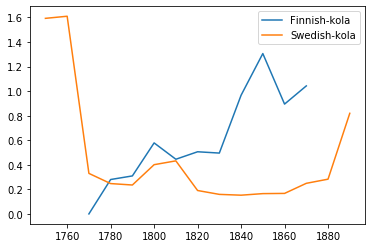

In [9]:
candidates_d = getFreqsDict(["kola"])

plt.plot(finYears, candidates_d['kola'][0], label="Finnish-kola") # TODO: Cast as a date and better x-axis formatting
plt.plot(sweYears, candidates_d['kola'][1], label="Swedish-kola")
plt.legend()

Finnish loanword freq memma: 	Finnish: 0.036777 	Swedish: 0.000000 	 [True]


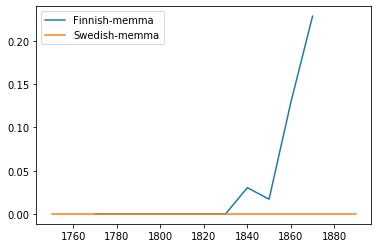

In [10]:
candidates_d = getFreqsDict(["memma"])
plt.plot(finYears, candidates_d['memma'][0], label="Finnish-memma")
plt.plot(sweYears, candidates_d['memma'][1], label="Swedish-memma")
plt.legend()

Finnish loanword freq raha: 	Finnish: 0.012326 	Swedish: 0.000000 	 [True]
Finnish loanword freq kova: 	Finnish: 0.011458 	Swedish: 0.010739 	 [True]


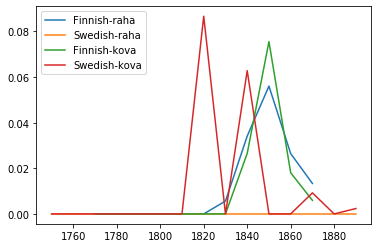

In [11]:
candidates_d = getFreqsDict(["raha", "kova"])
plt.plot(finYears, candidates_d['raha'][0], label="Finnish-raha")
plt.plot(sweYears, candidates_d['raha'][1], label="Swedish-raha")
plt.plot(finYears, candidates_d['kova'][0], label="Finnish-kova")
plt.plot(sweYears, candidates_d['kova'][1], label="Swedish-kova")
plt.legend()

Finnish loanword freq pojke: 	Finnish: 0.290092 	Swedish: 0.458642 	 [False]
Finnish loanword freq poika: 	Finnish: 0.111841 	Swedish: 0.001719 	 [True]


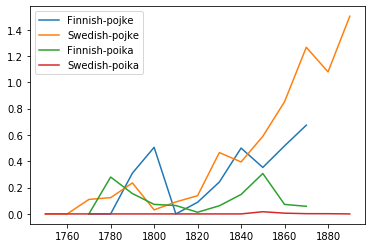

In [12]:
candidates_d = getFreqsDict(["pojke", "poika"])
plt.plot(finYears, candidates_d['pojke'][0], label="Finnish-pojke")
plt.plot(sweYears, candidates_d['pojke'][1], label="Swedish-pojke")
plt.plot(finYears, candidates_d['poika'][0], label="Finnish-poika")
plt.plot(sweYears, candidates_d['poika'][1], label="Swedish-poika")
plt.legend()

## Trying to Find other Dialectical Differences
Look at words that differ significantly in frequency across the finnish and swedish texts. 

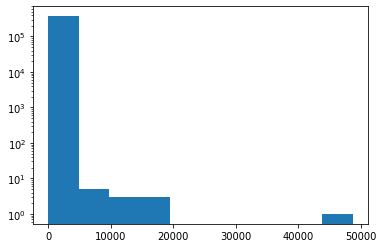

In [41]:
plt.hist(fin.allCounters[np.datetime64('1800')].values())
plt.yscale("log")

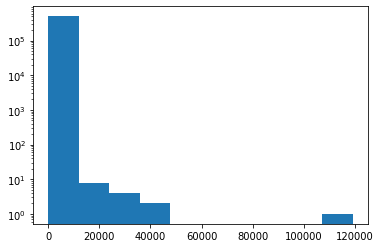

In [40]:
plt.hist(swe.allCounters[np.datetime64('1800')].values())
plt.yscale('log')

In [51]:
len(list(filter(lambda x: x > 1, swe.allCounters[np.datetime64('1800')].values()))) 

122972

In [71]:
filterCounter = lambda counter: {k: v for k, v in counter.items() if v > 1}
allFinWords = [Counter(filterCounter(words)) for year, words in fin.allCounters.items()]
allFinWords = sum(allFinWords, Counter())

allSweWords = [Counter(filterCounter(words)) for year, words in swe.allCounters.items()]
allSweWords = sum(allSweWords, Counter())

In [76]:
print(len(allFinWords), len(allSweWords))

3707214 1740217


In [74]:
differentWords = {}
for word, finCount in allFinWords.items(): 
    sweCount = allSweWords[word]
    
    a, b = finCount, sweCount
    c, d = finWordCount, sweWordCount
    e1 = c * (a + b) / (c + d)
    e2 = d * (a + b) / (c + d)
    G2 = 2* (a * np.log(a / e1) + b * np.log(b / e2))
    p = 1 - stats.chi2.cdf(G2, 1)
    
    if p < 0.05: 
        # print("Significantly different usage of word: ", word)
        differentWords[word] = p

differentWords = {k: differentWords[k] for k in sorted(differentWords)}

/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':
/share/apps/anaconda3/2020.02/lib/python3.7/site-packages/ipykernel_launcher.py:9: RuntimeWarning: invalid value encountered in double_scalars
  if __name__ == '__main__':
